In [1]:
%matplotlib inline
import matplotlib
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
import claude.tx as tx
import claude.utils as cu
import claude.claudeflow.helper as cfh
import claude.claudeflow.systems as cfs

In [3]:
N          = 2048  # number of symbols per dim
sps        = 32    # samples per symbol
span       = 256   # filter span
rollOff    = 1.0   # rollOff factor

M          = 4     # constellation order
batch_size = 2     # batch_size

In [4]:
constellation = tx.qammod(M)

(-1, 1)

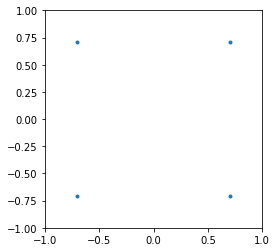

In [5]:
plt.plot( np.real(constellation[0,:]), np.imag(constellation[0,:]), '.' );
plt.axis('square');
plt.xlim(-1,1)
plt.ylim(-1,1)

In [6]:
constellation_tf = tf.constant(constellation, tf.complex64)
X = tf.placeholder(tf.float32, shape=(None, 16, N, M)) # (batch_size, arbitrary dimension, nSamples, constellation-order)
print('constellation_tf\t', constellation_tf)
print('X\t\t\t', X)

symbols = cfh.QAMencoder(X, constellation_tf, realOutput=False)
print('symbols\t\t\t', symbols)

symbols_up = cfh.upsample(symbols, sps, N)
print('symbols_up\t\t', symbols_up)

signal = cfh.pulseshaper(symbols_up, rollOff, sps, span, N)
print('signal\t\t\t', signal)

signal_obs = cfh.pulseshaper(signal, rollOff, sps, span, N)
signal_obs = signal_obs
print('signal_obs\t\t', signal_obs)

symbols_obs = cfh.downsample(signal_obs, sps, N)
print('symbols_obs\t\t', symbols_obs)

constellation_tf	 Tensor("Const:0", shape=(1, 4), dtype=complex64)
X			 Tensor("Placeholder:0", shape=(?, 16, 2048, 4), dtype=float32)
symbols			 Tensor("Squeeze:0", shape=(?, 16, 2048), dtype=complex64)
symbols_up		 Tensor("Reshape:0", shape=(?, 16, 65536), dtype=complex64)
signal			 Tensor("IFFT:0", shape=(?, 16, 65536), dtype=complex64)
signal_obs		 Tensor("IFFT_1:0", shape=(?, 16, 65536), dtype=complex64)
symbols_obs		 Tensor("strided_slice_2:0", shape=(?, 16, 2048), dtype=complex64)


In [7]:
x, idx, x_seed = cu.hotOnes((batch_size,16,N), (1,2,3,0), M, seed=None)

sess = tf.Session()
feedDict = {X:x}
[np_symbols, np_signal, np_symbols_obs] = sess.run([symbols, signal, symbols_obs], feed_dict=feedDict)

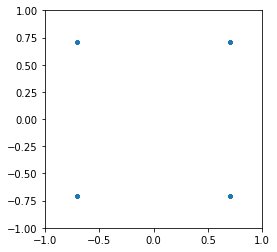

In [8]:
plt.plot(np.real(np_symbols[0,0,:]), np.imag(np_symbols[0,0,:]), '.')
plt.axis('square');
plt.xlim(-1,1);
plt.ylim(-1,1);

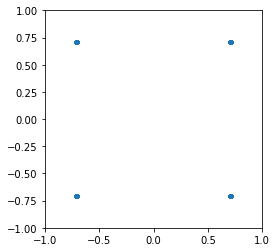

In [9]:
plt.plot(np.real(np_symbols_obs[0,0,:]), np.imag(np_symbols_obs[0,0,:]), '.')
plt.axis('square');
plt.xlim(-1,1);
plt.ylim(-1,1);

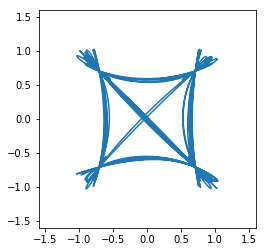

In [10]:
plt.plot(np.sqrt(sps)*np.real(np_signal[0,0,0:50*sps]), np.sqrt(sps)*np.imag(np_signal[0,0,0:50*sps]))
plt.axis('square');
lim = 1.6
plt.xlim(-lim,lim);
plt.ylim(-lim,lim);

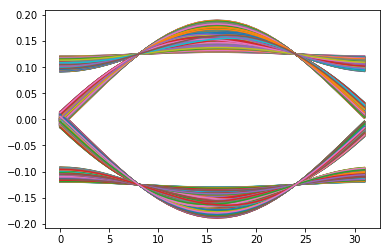

In [11]:
sps2 = int(sps/2)
eye = np.reshape(np.real(np_signal[0,0,sps2:-sps2]),(N-1,sps)).T
plt.plot(eye);